In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
!ls

README.md
Rasio_Jumlah_Populasi_Manusia_dan_Bitcoin.ipynb
archive.zip
world_population.csv


In [3]:
data_in_1=pd.read_csv("world_population.csv")
data_in_1

,Rank,CCA3,Country/Territory,Capital,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
0,36,AFG,Afghanistan,Kabul,Asia,41128771,38972230,33753499,28189672,19542982,10694796,12486631,10752971,652230,63.0587,1.0257,0.52
1,138,ALB,Albania,Tirana,Europe,2842321,2866849,2882481,2913399,3182021,3295066,2941651,2324731,28748,98.8702,0.9957,0.04
2,34,DZA,Algeria,Algiers,Africa,44903225,43451666,39543154,35856344,30774621,25518074,18739378,13795915,2381741,18.8531,1.0164,0.56
3,213,ASM,American Samoa,Pago Pago,Oceania,44273,46189,51368,54849,58230,47818,32886,27075,199,222.4774,0.9831,0.00
4,203,AND,Andorra,Andorra la Vella,Europe,79824,77700,71746,71519,66097,53569,35611,19860,468,170.5641,1.0100,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229,226,WLF,Wallis and Futuna,Mata-Utu,Oceania,11572,11655,12182,13142,14723,13454,11315,9377,142,81.4930,0.9953,0.00
230,172,ESH,Western Sahara,El Aaiún,Africa,575986,556048,491824,413296,270375,178529,116775,76371,266000,2.1654,1.0184,0.01
231,46,YEM,Yemen,Sanaa,Asia,33696614,32284046,28516545,24743946,18628700,13375121,9204938,6843607,527968,63.8232,1.0217,0.42
232,63,ZMB,Zambia,Lusaka,Africa,20017675,18927715,16248230,13792086,9891136,7686401,5720438,4281671,752612,26.5976,1.0280,0.25


In [4]:
years=['2022 Population','2020 Population','2015 Population','2010 Population']
clean_years = [year.replace(" Population", "") for year in years]
data_in_1.columns = data_in_1.columns.str.replace(" Population", "")

# Memilih kolom yang ingin dijumlahkan
sum_data = data_in_1[clean_years].sum()
sum_data

2022    7973413042
2020    7839250603
2015    7424809761
2010    6983784998
dtype: int64

In [5]:
import numpy as np
x = clean_years
X = []
for i in x:
    X.append(int(i))
X = np.asarray(X)
y = sum_data.values
print(X)
print(y)

[2022 2020 2015 2010]
[7973413042 7839250603 7424809761 6983784998]


Text(0, 0.5, 'Jumlah Penduduk Dunia')

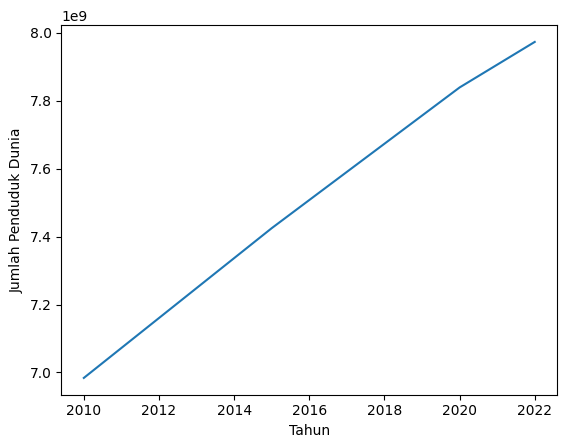

In [6]:
plt.figure(1)
plt.plot(X,y)
plt.xlabel("Tahun")
plt.ylabel("Jumlah Penduduk Dunia")

In [7]:
jumlah_hard_cap_bitcoin=[21000000]*len(y)
jumlah_hard_cap_bitcoin = np.asarray(jumlah_hard_cap_bitcoin)

In [8]:
btc_to_population=jumlah_hard_cap_bitcoin/y

In [9]:
harga_btc = [16625,28841,420,0.2]

data_all = pd.DataFrame({'Tahun':x,'Jumlah_Populasi':y,
                         'Hard_Cap_BTC_Supply_Terhadap_Penduduk':btc_to_population,
                        'Jumlah_BTC_x_harga_in_$':harga_btc*btc_to_population})
data_all

,Tahun,Jumlah_Populasi,Hard_Cap_BTC_Supply_Terhadap_Penduduk,Jumlah_BTC_x_harga_in_$
0,2022,7973413042,0.002634,43.786143
1,2020,7839250603,0.002679,77.260064
2,2015,7424809761,0.002828,1.187909
3,2010,6983784998,0.003007,0.000601


Text(0, 0.5, 'Nilai Investasi di BTC dalam USD \n Red Line')

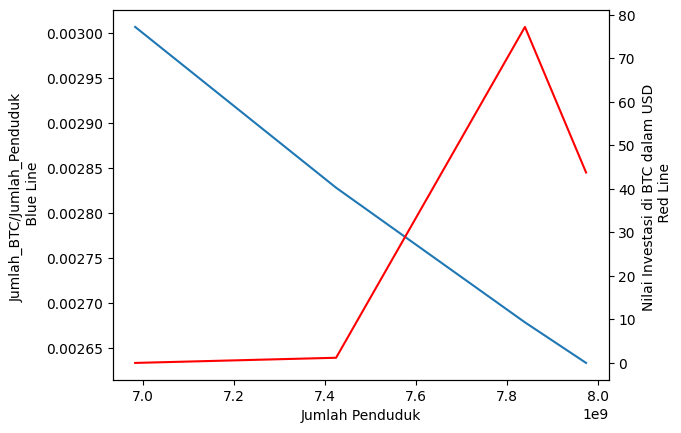

In [10]:
plt.figure(2)
plt.plot(data_all['Jumlah_Populasi'],data_all['Hard_Cap_BTC_Supply_Terhadap_Penduduk'],label="Rasio Hard Cap BTC/Jumlah Penduduk Dunia")
plt.xlabel("Jumlah Penduduk")
plt.ylabel("Jumlah_BTC/Jumlah_Penduduk \n Blue Line")

plt.twinx()
plt.plot(data_all['Jumlah_Populasi'],data_all['Jumlah_BTC_x_harga_in_$'],'r',label="Nilai Investasi di BTC dalam USD")
plt.ylabel("Nilai Investasi di BTC dalam USD \n Red Line")

## Kesimpulan

Dalam penelitian ini, telah dikembangkan sebuah program untuk menghitung jumlah hard cap bitcoin relatif terhadap jumlah penduduk dunia. Data jumlah penduduk dunia diperoleh dari sumber [kaggle] (https://www.kaggle.com/datasets/iamsouravbanerjee/world-population-dataset), sementara data harga bitcoin diperoleh dari [Coin Market Cap](https://coinmarketcap.com/currencies/bitcoin/) dengan menggunakan harga penutupan pada bulan Desember setiap tahunnya. Berdasarkan hasil penelitian, terlihat bahwa jumlah hard cap bitcoin memiliki hubungan terbalik dengan jumlah penduduk dunia. Artinya, jika jumlah penduduk dunia meningkat, maka proporsi hard cap bitcoin per penduduk dunia akan mengalami penurunan. Namun, nilai investasi dalam bitcoin cenderung berhubungan positif dengan jumlah penduduk dunia, meskipun terkadang dapat mengalami fluktuasi. Berdasarkan penelitian ini, jika kita memiliki jumlah bitcoin yang melebihi 0.00265, dapat dikatakan bahwa kita memiliki bitcoin dalam jumlah yang lebih tinggi daripada rasio hard cap bitcoin per penduduk dunia.

Program ini dibuat dengan tujuan penelitian semata dan bukan ajakan untuk membeli bitcoin ataupun asset kripto lainnya. Harap melakukan pertimbangan yang matang sebelum melakukan pembelian pada sebuah aset baik bitcoin, kripto, ataupun aset lainnya.

Happy Bitcoin Pizza Day Teman-Teman Semua 